In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
data = pd.read_csv(r"C:\Users\Honest\Downloads\unimi-lab\data\merged_data.csv", thousands=',')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (182, 14)


,Country Code,Continent,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
0,AFG,Asia,NaN,23.0,9.0,2.037373e+09,2.234789e+08,62575.0,977,557.0,301.0,2.701613e+09,385.0,-1183776498
1,ALB,Europe,5.639534e+09,577.0,6.0,2.344448e+09,1.544550e+09,76989.0,100,95.0,41.0,3.571429e+09,71367.0,-407875538
2,DZA,Africa,9.991036e+07,62.0,2.0,2.258692e+09,3.718223e+08,74453.0,9978782654,223.0,25.0,8.108108e+09,45641.0,-637929857
3,AND,Europe,NaN,637.0,NaN,NaN,5.777148e+09,NaN,100,28.0,NaN,4.642857e+09,NaN,127020359
4,AGO,Africa,4.650855e+09,275.0,1.0,1.518007e+09,5.927430e+08,62261.0,4822385406,694.0,216.0,2.954545e+09,76156.0,-601941288


In [3]:
# Dive into the dataset provided by World Bank to understand ESG metrics for Italy, continents, and the world.

df_ita = data[data['Country Code'].str.contains('ITA')]
df_eur =  data[data['Continent'] == 'Europe']
df_rest = data[data['Continent'] != 'Europe']


In [4]:
df_rest = data[data['Continent'] != 'Europe']

In [ ]:
data.columns

In [4]:
df_eur = df_eur.drop('Country Code', axis=1)
df_eur = df_eur.groupby('Continent').mean().reset_index()
df_eur.head()

,Continent,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
0,Europe,6.655562e+09,585.139535,5.581395,2.206548e+09,4.498740e+09,5.899445e+09,2.169543e+07,44.377778,26.785714,2.133701e+09,64397.317073,5.354605e+08


In [5]:
# FOR THE ITA Table

df_ita = df_ita.drop('Continent', axis=1)
df_ita

,Country Code,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
76,ITA,7.996433e+09,585.0,2.0,2.441058e+09,4.732373e+09,8.219512e+09,100,26.0,25.0,3.571429e+09,65758.0,527781725


In [6]:
# FOR THE OTHER Table

df_rest= df_rest.drop('Country Code', axis=1)
df_rest['Continent'] = df_rest.loc[df_rest['Continent'] !='', 'Continent'] = 'Other'
df_rest = df_rest.groupby('Continent').mean().reset_index()
df_rest.head()

,Continent,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
0,Other,5.732410e+09,421.738806,4.871212,2.043687e+09,1.745313e+09,4.184694e+08,3.143660e+09,308.066176,113.775862,2.395858e+09,56533.785714,-2.109323e+08


In [15]:
merge = pd.concat([df_ita, df_eur, df_rest], sort=False)
merge

,Country Code,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022",Continent
76,ITA,7.996433e+09,585.000000,2.000000,2.441058e+09,4.732373e+09,8.219512e+09,1.000000e+02,26.000000,25.000000,3.571429e+09,65758.000000,5.277817e+08,NaN
0,NaN,6.655562e+09,585.139535,5.581395,2.206548e+09,4.498740e+09,5.899445e+09,2.169543e+07,44.377778,26.785714,2.133701e+09,64397.317073,5.354605e+08,Europe
0,NaN,5.732410e+09,421.738806,4.871212,2.043687e+09,1.745313e+09,4.184694e+08,3.143660e+09,308.066176,113.775862,2.395858e+09,56533.785714,-2.109323e+08,Other


In [16]:
merge.loc[merge.Continent=='Europe', 'Country Code'] = 'Europe'
merge.loc[merge['Continent']=='Other', 'Country Code'] = 'Other'
merge = merge.drop('Continent', axis=1)
merge

,Country Code,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
76,ITA,7.996433e+09,585.000000,2.000000,2.441058e+09,4.732373e+09,8.219512e+09,1.000000e+02,26.000000,25.000000,3.571429e+09,65758.000000,5.277817e+08
0,Europe,6.655562e+09,585.139535,5.581395,2.206548e+09,4.498740e+09,5.899445e+09,2.169543e+07,44.377778,26.785714,2.133701e+09,64397.317073,5.354605e+08
0,Other,5.732410e+09,421.738806,4.871212,2.043687e+09,1.745313e+09,4.184694e+08,3.143660e+09,308.066176,113.775862,2.395858e+09,56533.785714,-2.109323e+08


In [17]:
merge = merge.set_index('Country Code')
merge

,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
Country Code,,,,,,,,,,,,
ITA,7.996433e+09,585.000000,2.000000,2.441058e+09,4.732373e+09,8.219512e+09,1.000000e+02,26.000000,25.000000,3.571429e+09,65758.000000,5.277817e+08
Europe,6.655562e+09,585.139535,5.581395,2.206548e+09,4.498740e+09,5.899445e+09,2.169543e+07,44.377778,26.785714,2.133701e+09,64397.317073,5.354605e+08
Other,5.732410e+09,421.738806,4.871212,2.043687e+09,1.745313e+09,4.184694e+08,3.143660e+09,308.066176,113.775862,2.395858e+09,56533.785714,-2.109323e+08


In [18]:
non_nm_esg = pd.DataFrame()

non_nm_esg['Environmental Score'] = merge[['Access to electricity (% of population), 2021','CO2 emissions (metric tons per capita), 2020','Fossil fuel energy consumption (% of total), 2013']].mean(axis=1)
non_nm_esg['Governance Score'] = merge[['Control of Corruption: Estimate, 2022', 'Economic and Social Rights Performance Score, 2018','Strength of legal rights index (0=weak to 12=strong), 2016', 'Proportion of seats held by women in national parliaments (%), 2021',]].mean(axis=1)
non_nm_esg['Social Score'] = merge[['Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022', 'Life expectancy at birth, total (years), 2020','Prevalence of overweight (% of adults), 2016','Mortality rate, under-5 (per 1,000 live births), 2021','Prevalence of undernourishment (% of population), 2021',]].mean(axis=1)


non_nm_esg

,Environmental Score,Governance Score,Social Score
Country Code,,,
ITA,4.242935e+09,1.635067e+09,1.643916e+09
Europe,3.725333e+09,1.218927e+09,1.179902e+09
Other,3.540461e+09,1.057153e+09,8.370536e+07


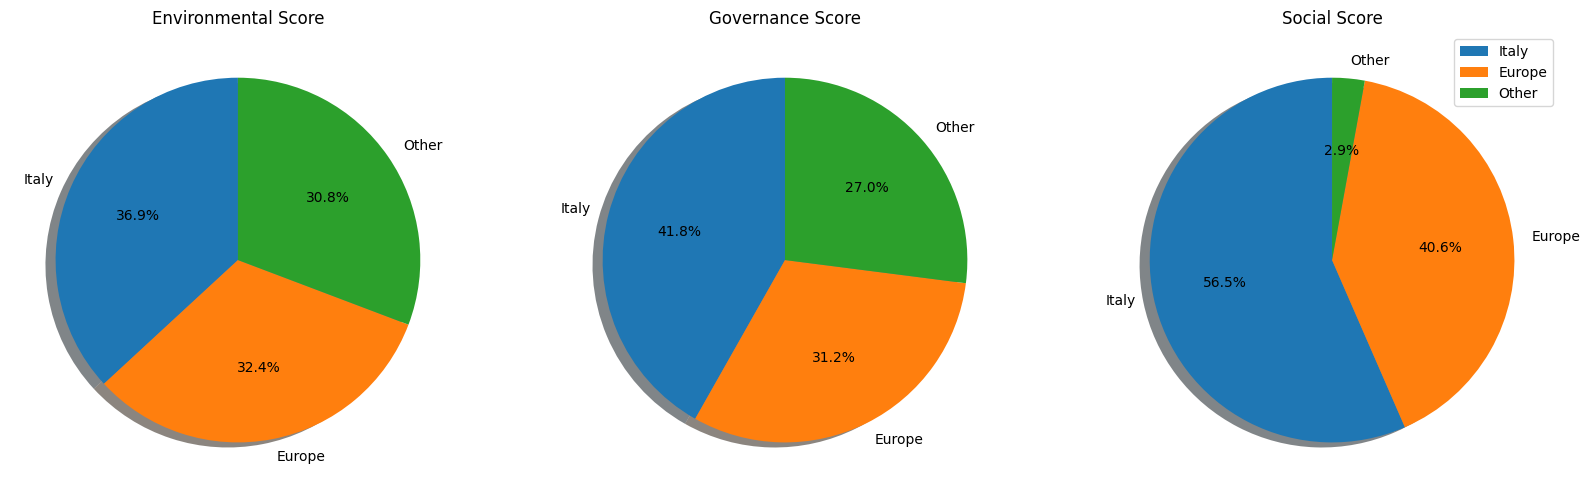

In [19]:
# Pie charts 

labels= 'Italy', 'Europe', 'Other'

fig, ax = plt.subplots(1,3, figsize=(20, 18))

ax
ax[0].pie(non_nm_esg['Environmental Score'], labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)


ax[1].pie(non_nm_esg['Governance Score'], labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)


ax[2].pie(non_nm_esg['Social Score'], labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)


ax[0].set_title('Environmental Score')
ax[1].set_title('Governance Score')
ax[2].set_title('Social Score')

plt.legend()
plt.show()

# axes[1].plot(df2['Partner'].value_counts(), kind='pie', figsize=(5,5), fontsize=10, autopct='%1.0f%%')
# axes[1].set_title('% of People with and without partner', fontsize = 12)

# axes[2].plot(df2['Dependents'].value_counts(), kind='pie', figsize=(5,5), fontsize=10, autopct='%1.0f%%')
# axes[2].set_title('% of People with and without dependent', fontsize = 12)



In [20]:
#Lets Normalize them columns
normalized_merge=(merge-merge.mean())/merge.std()
normalized_merge

,"Fossil fuel energy consumption (% of total), 2013","Prevalence of overweight (% of adults), 2016","Strength of legal rights index (0=weak to 12=strong), 2016","Economic and Social Rights Performance Score, 2018","CO2 emissions (metric tons per capita), 2020","Life expectancy at birth, total (years), 2020","Access to electricity (% of population), 2021","Mortality rate, under-5 (per 1,000 live births), 2021","Prevalence of undernourishment (% of population), 2021","Proportion of seats held by women in national parliaments (%), 2021","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022","Control of Corruption: Estimate, 2022"
Country Code,,,,,,,,,,,,
ITA,1.055529,0.57661,-1.134274,1.054405,0.646240,0.842198,-0.583337,-0.634597,-0.594855,1.137655,0.708564,0.568372
Europe,-0.122310,0.57809,0.754397,-0.119559,0.505603,0.263026,-0.571343,-0.518144,-0.559667,-0.740016,0.435308,0.586282
Other,-0.933219,-1.15470,0.379877,-0.934846,-1.151842,-1.105224,1.154680,1.152741,1.154522,-0.397639,-1.143872,-1.154654


In [21]:
nm_esg = pd.DataFrame()

nm_esg['Environmental Score'] = normalized_merge[['Access to electricity (% of population), 2021','CO2 emissions (metric tons per capita), 2020','Fossil fuel energy consumption (% of total), 2013']].mean(axis=1)
nm_esg['Governance Score'] = normalized_merge[['Control of Corruption: Estimate, 2022', 'Economic and Social Rights Performance Score, 2018','Strength of legal rights index (0=weak to 12=strong), 2016', 'Proportion of seats held by women in national parliaments (%), 2021',]].mean(axis=1)
nm_esg['Social Score'] = normalized_merge[['Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), 2022', 'Life expectancy at birth, total (years), 2020','Prevalence of overweight (% of adults), 2016','Mortality rate, under-5 (per 1,000 live births), 2021','Prevalence of undernourishment (% of population), 2021',]].mean(axis=1)


nm_esg

,Environmental Score,Governance Score,Social Score
Country Code,,,
ITA,0.372811,0.406539,0.179584
Europe,-0.062683,0.120276,0.039722
Other,-0.310127,-0.526815,-0.219307


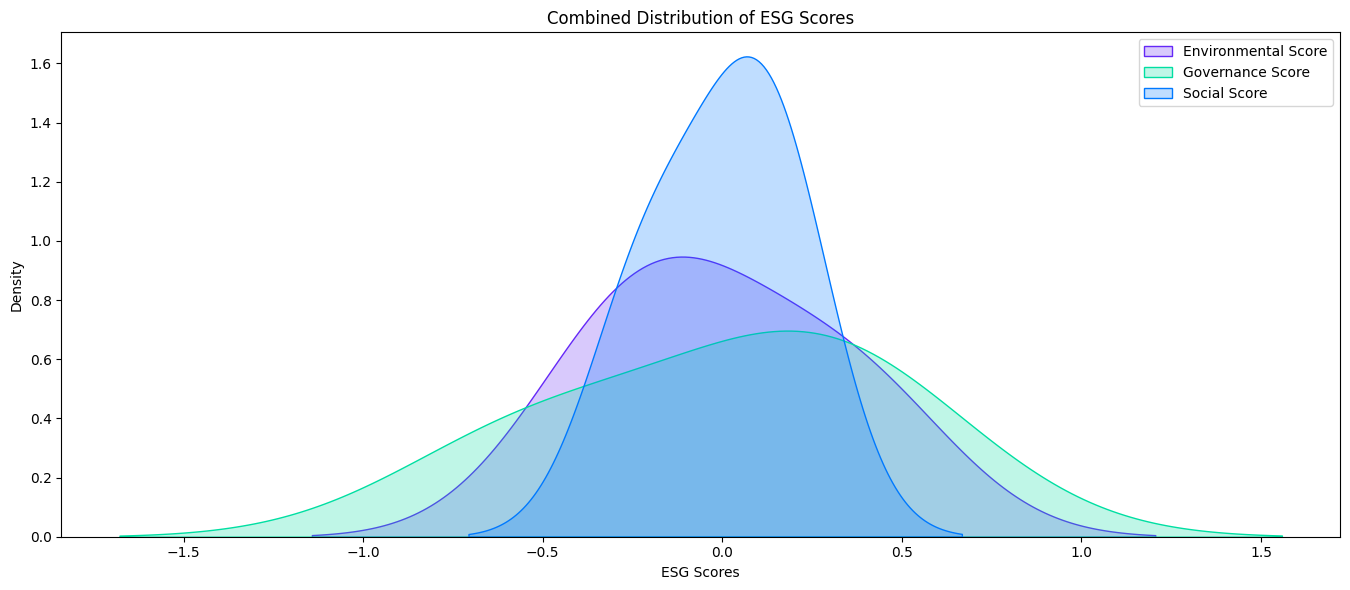

In [22]:
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]

plt.figure(figsize=(13.6, 6))

# Iterate through each ESG score column and plot its KDE
for i, col in enumerate(nm_esg.columns):
    sns.kdeplot(
        nm_esg[col],
        color=colors[i], 
        label=col, 
        fill=True
    )
    
# Add labels and a title
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
merge.rename(columns = lambda x : str(x)[:-6])

,Fossil fuel energy consumption (% of total),Prevalence of overweight (% of adults),Strength of legal rights index (0=weak to 12=strong),Economic and Social Rights Performance Score,CO2 emissions (metric tons per capita),"Life expectancy at birth, total (years)",Access to electricity (% of population),"Mortality rate, under-5 (per 1,000 live births)",Prevalence of undernourishment (% of population),Proportion of seats held by women in national parliaments (%),"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",Control of Corruption: Estimate
Country Code,,,,,,,,,,,,
ITA,7.996433e+09,585.000000,2.000000,2.441058e+09,4.732373e+09,8.219512e+09,1.000000e+02,26.000000,25.000000,3.571429e+09,65758.000000,5.277817e+08
Europe,6.655562e+09,585.139535,5.581395,2.206548e+09,4.498740e+09,5.899445e+09,2.169543e+07,44.377778,26.785714,2.133701e+09,64397.317073,5.354605e+08
Other,5.732410e+09,421.738806,4.871212,2.043687e+09,1.745313e+09,4.184694e+08,3.143660e+09,308.066176,113.775862,2.395858e+09,56533.785714,-2.109323e+08


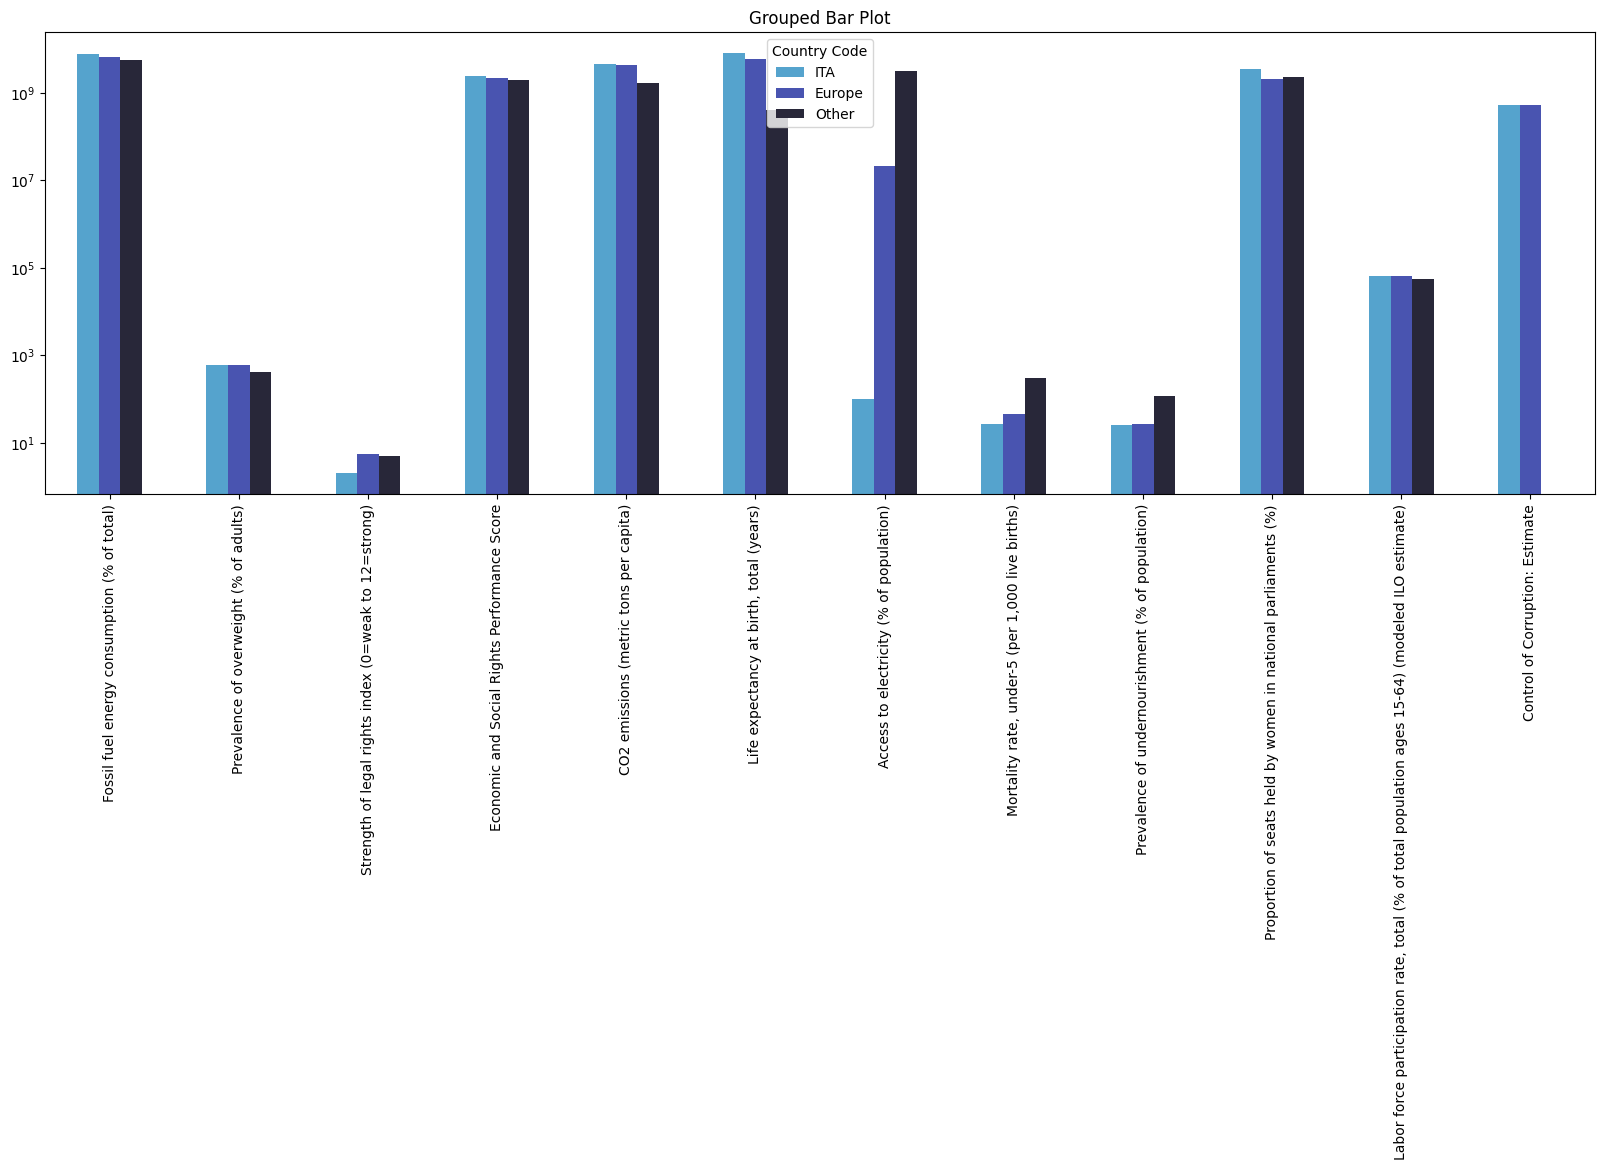

In [88]:
# ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
modified = merge.rename(columns = lambda x : str(x)[:-6])
trnsp = modified.T
trnsp.plot(kind='bar',logy=True, figsize=(20, 6), use_index=True, color = sns.color_palette("icefire"))
plt.title('Grouped Bar Plot')
plt.show()

In [ ]:
for col in merge.columns:
    merge[col].plot(kind='bar', logy=True)
    plt.title(col)
    plt.show()
